# Viz for social Good - Japan Food Bank

Using a small part of the Viz For Social Good data set.
All data is [here](https://www.vizforsocialgood.com/join-a-project/2019/4/1/jpfoodbank)

Focusing on wasted food

In [53]:
library(tidyverse)
library(ggthemes)

library(repr)
options(repr.plot.width=6, repr.plot.height=4)

gaspi <- read_csv('gaspi.csv')%>% 
    gather(Gaspi, Total, - Qui)

Parsed with column specification:
cols(
  Qui = col_character(),
  DontNonPérimés = col_double(),
  Total = col_double()
)


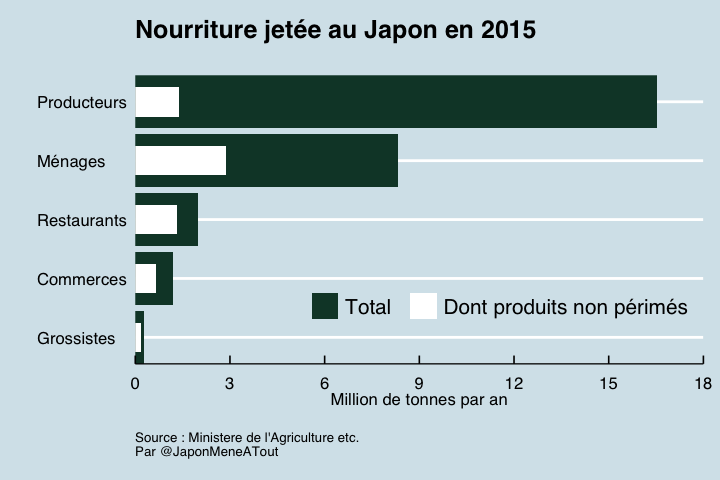

In [54]:
ggplot() +
    geom_bar(data = gaspi %>% filter(Gaspi=='Total'), aes(reorder(Qui, Total), Total, fill=Gaspi), stat='identity') +
    geom_bar(data = gaspi %>% filter(Gaspi!='Total'), aes(reorder(Qui, Total), Total, fill=Gaspi), stat='identity', width = .5) +
#     coord_cartesian() +
    coord_flip(expand = F) +
    theme_economist() +
    labs(
        x = '',
        y = 'Million de tonnes',
        title = 'Nourriture jetée au Japon en 2015',
        subtitle = '',
        caption = "\nSource : Ministere de l'Agriculture etc.\nPar @JaponMeneATout"
    ) + 
    theme(
        legend.title = element_blank(),
        legend.position = c(0.65, 0.2),
        legend.direction = "horizontal",
        plot.caption = element_text(hjust=0)
    ) +
    scale_fill_manual(
        labels = c(" Dont produits non périmés", " Total   "),
        values = c("#FFFFFF", "#114232")
    ) +
    guides(fill = guide_legend(reverse = TRUE)) +
    scale_y_continuous(limits=c(0, 18), breaks = seq(0, 18, 3))

In [17]:
gaspi %>% filter(Gaspi=='Total')

Qui,Gaspi,Total
Producteurs,Total,16.53
Grossistes,Total,0.29
Commerces,Total,1.20
Restaurants,Total,2.00
Ménages,Total,8.32
